## Imports

In [1]:
import numpy as np
import pandas as pd

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

## Setup Data

In [3]:
train = pd.read_csv('titanic_train.csv')
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
train.isnull()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,False,False,False,False,False,False,False,False,False,False,True,False
1,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,True,False
3,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...
886,False,False,False,False,False,False,False,False,False,False,True,False
887,False,False,False,False,False,False,False,False,False,False,False,False
888,False,False,False,False,False,True,False,False,False,False,True,False
889,False,False,False,False,False,False,False,False,False,False,False,False


## Visualize Data

<AxesSubplot:>

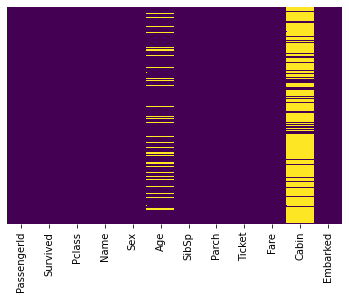

In [5]:
# In order to visualize missing data
sns.heatmap(train.isnull(), yticklabels=False, cbar=False, cmap='viridis')

In [6]:
sns.set_style='whitegrid'

<AxesSubplot:xlabel='Survived', ylabel='count'>

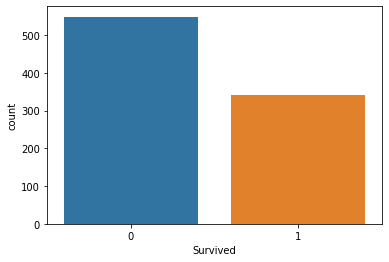

In [7]:
# Visualize the number of survivors
sns.countplot(x='Survived', data=train)

# More deceased than survivors

<AxesSubplot:xlabel='Survived', ylabel='count'>

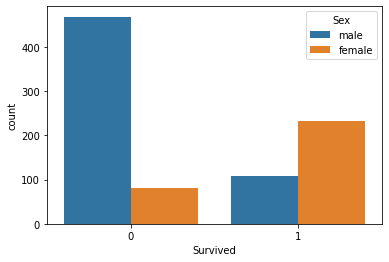

In [8]:
# Visualize the number of survivors (with sex)
sns.countplot(x='Survived', hue='Sex', data=train)

# More males died than females, more females survived than males

<AxesSubplot:xlabel='Survived', ylabel='count'>

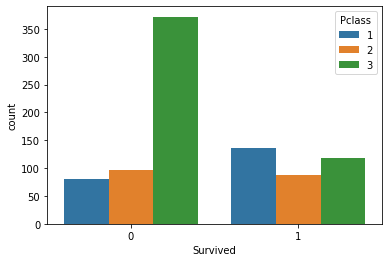

In [9]:
# Visualize the number of survivors (with class)
sns.countplot(x='Survived', hue='Pclass', data=train)

# More 3rd class Passengers died

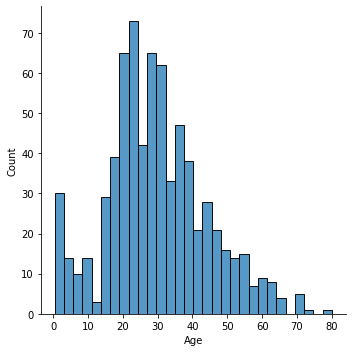

In [10]:
# Visualize the distribution of age
sns.displot(train['Age'].dropna(), kde=False, bins=30)

# Skewed towards younger passengers

<AxesSubplot:ylabel='Frequency'>

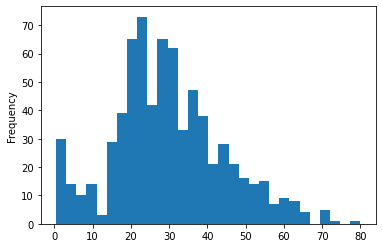

In [11]:
# Pandas Visualization
train['Age'].plot.hist(bins=30)

<AxesSubplot:xlabel='SibSp', ylabel='count'>

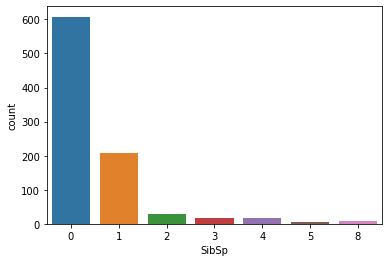

In [12]:
# Visualize number of siblings/spouses

sns.countplot(x='SibSp', data=train)

# Most passengers did not have a sibling or spouse on board

<AxesSubplot:>

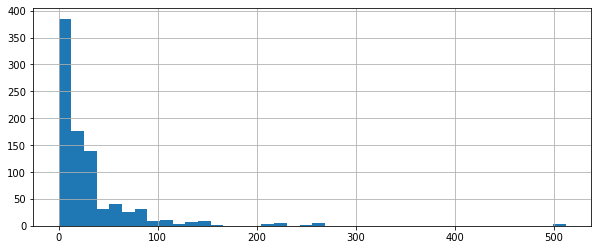

In [13]:
# Visualize the fare distribution

train['Fare'].hist(bins=40, figsize=(10, 4))

# Most fares between 0 and 100

<AxesSubplot:xlabel='Fare', ylabel='Count'>

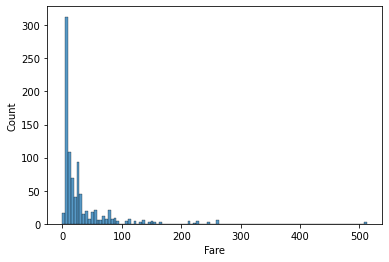

In [14]:
# Seaborn visualization
sns.histplot(x='Fare', data=train)

In [15]:
# Plotly/Cufflinks visualization
import cufflinks as cf
cf.go_offline()

train['Fare'].iplot(kind='hist', bins=30)

## Further Data Visualizations

<AxesSubplot:xlabel='Pclass', ylabel='Age'>

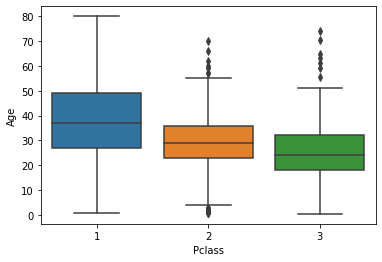

In [16]:
# Visualize wealth and age

sns.boxplot(x='Pclass', y='Age', data=train)

# 1st class passengers were generally older

## Filling in Missing Data

In [17]:
# Using average age values to impute age from passenger class

first_class_avg = train.query('Pclass==1')['Age'].mean()
second_class_avg = train.query('Pclass==2')['Age'].mean()
third_class_avg = train.query('Pclass==3')['Age'].mean()

print(first_class_avg, second_class_avg, third_class_avg)

def impute_age(cols):
    Age = cols[0]
    Pclass = cols[1]
    
    if pd.isnull(Age):
        if Pclass == 1:
            return first_class_avg
        elif Pclass == 2:
            return second_class_avg
        elif Pclass == 3:
            return third_class_avg
    else:
        return Age

38.233440860215055 29.87763005780347 25.14061971830986


In [18]:
train['Age'] = train[['Age', 'Pclass']].apply(impute_age, axis=1)

<AxesSubplot:>

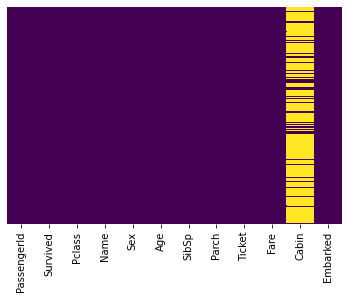

In [19]:
# Visualize filled data
sns.heatmap(train.isnull(), yticklabels=False, cbar=False, cmap='viridis')

In [20]:
# Cabin has too many missing values
train.drop('Cabin', axis=1, inplace=True)

In [21]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


<AxesSubplot:>

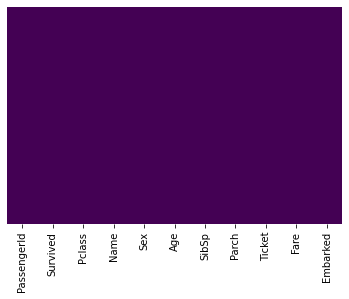

In [22]:
# Visualize Data
sns.heatmap(train.isnull(), yticklabels=False, cbar=False, cmap='viridis')

In [23]:
# Drop any missing values
train.dropna(inplace=True)

<AxesSubplot:>

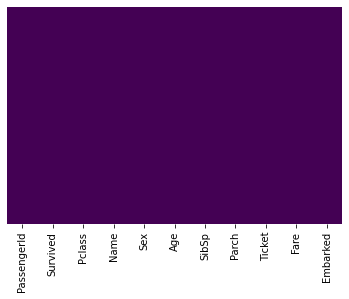

In [24]:
# Visualize Data
sns.heatmap(train.isnull(), yticklabels=False, cbar=False, cmap='viridis')

## Converting Categorical Features
Creating a dummy variable instead for these features

In [25]:
train.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Embarked'],
      dtype='object')

In [26]:
pd.get_dummies(train['Sex'])

# Still need to avoid multicollinearity 

,female,male
0,0,1
1,1,0
2,1,0
3,1,0
4,0,1
...,...,...
886,0,1
887,1,0
888,1,0
889,0,1


In [27]:
sex = pd.get_dummies(train['Sex'], drop_first=True)

In [28]:
embark = pd.get_dummies(train['Embarked'], drop_first=True)
embark.head()

# Avoids columns that are perfect predictions of each other

,Q,S
0,0,1
1,0,0
2,0,1
3,0,1
4,0,1


In [29]:
train = pd.concat([train, sex, embark], axis=1)
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,male,Q,S
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S,1,0,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,0,0,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S,0,0,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S,0,0,1
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S,1,0,1


In [30]:
# Drop categorical columns
train.drop(['Sex', 'Embarked', 'Name', 'Ticket'], axis=1, inplace=True)

In [31]:
train.head()

# All data is now numerical

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,male,Q,S
0,1,0,3,22.0,1,0,7.2500,1,0,1
1,2,1,1,38.0,1,0,71.2833,0,0,0
2,3,1,3,26.0,0,0,7.9250,0,0,1
3,4,1,1,35.0,1,0,53.1000,0,0,1
4,5,0,3,35.0,0,0,8.0500,1,0,1


In [32]:
train.drop('PassengerId', axis=1, inplace=True)
train.head()

# PassengerId cannot be used as a predictor

,Survived,Pclass,Age,SibSp,Parch,Fare,male,Q,S
0,0,3,22.0,1,0,7.2500,1,0,1
1,1,1,38.0,1,0,71.2833,0,0,0
2,1,3,26.0,0,0,7.9250,0,0,1
3,1,1,35.0,1,0,53.1000,0,0,1
4,0,3,35.0,0,0,8.0500,1,0,1


#### Passenger Class is a categorical column
It only has three distinct categories, so get_dummies can be run on it

## Training a Model
Predicting survival (0 or 1)

In [33]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

from sklearn import preprocessing

In [34]:
X = train.drop('Survived', axis=1)
y = train['Survived']

In [35]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [36]:
logmodel = LogisticRegression(max_iter=10000)

logmodel.fit(X_train, y_train)

LogisticRegression(max_iter=10000)

In [37]:
predictions = logmodel.predict(X_test)

In [38]:
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.84      0.88      0.86       168
           1       0.78      0.72      0.75        99

    accuracy                           0.82       267
   macro avg       0.81      0.80      0.80       267
weighted avg       0.82      0.82      0.82       267



In [39]:
print(confusion_matrix(y_test, predictions))

[[148  20]
 [ 28  71]]


## Further Exploration
I am playing around with the data set at this point. I attempt to make the honorifics in Name into a separate feature.

In [69]:
train = pd.read_csv('titanic_train.csv')

<AxesSubplot:xlabel='Sex', ylabel='Age'>

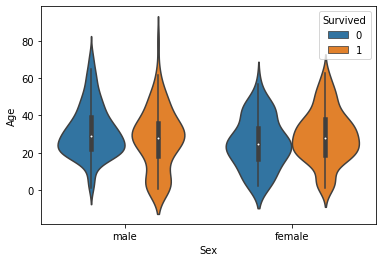

In [70]:
sns.violinplot(x='Sex', y='Age', hue='Survived', data=train)

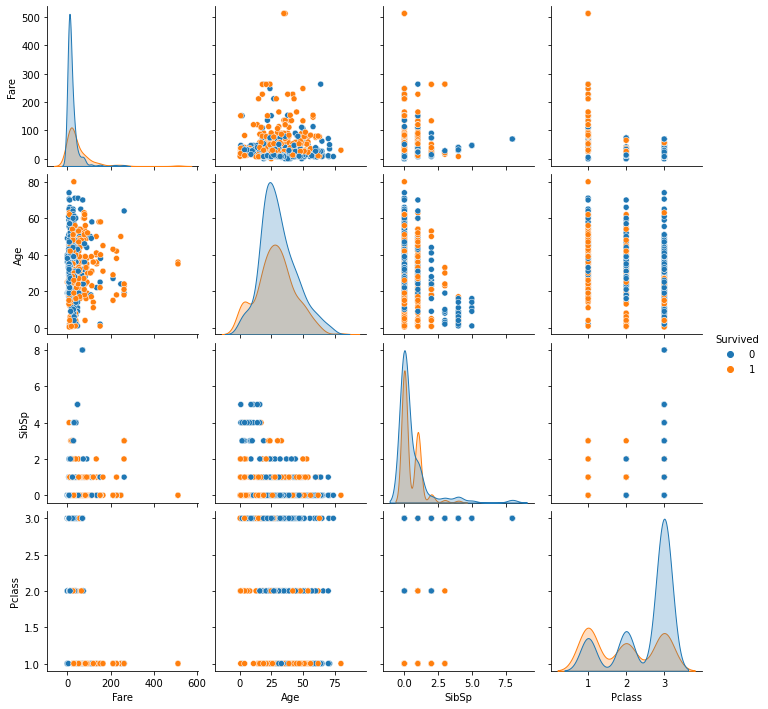

In [72]:
sns.pairplot(data=train[["Fare","Survived","Age", "SibSp","Pclass"]],
             hue="Survived", dropna=True)

It seems the passengers that paid more fare were more likely to survive. This is also seems to correspond with Passenger Class; more 1st class passengers survived than 2nd and 3rd, and they also seem to have paid the most fare.

In [41]:
train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

<AxesSubplot:>

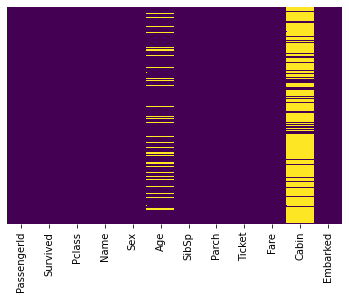

In [42]:
sns.heatmap(data=train.isnull(), yticklabels=False, cbar=False, cmap='viridis')

<AxesSubplot:xlabel='Pclass', ylabel='Age'>

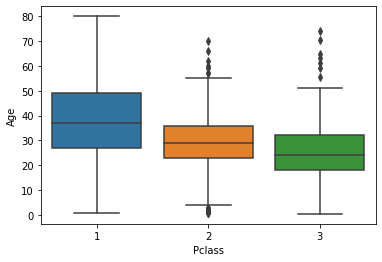

In [43]:
sns.boxplot(x='Pclass', y='Age', data=train)

In [44]:
train['Age'] = train[['Age', 'Pclass']].apply(impute_age, axis=1)

<AxesSubplot:>

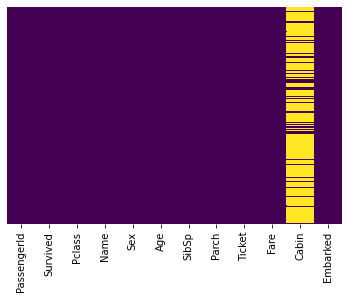

In [45]:
sns.heatmap(data=train.isnull(), yticklabels=False, cbar=False, cmap='viridis')

### Creating a Title Feature

In [46]:
titles = train['Name'].apply(lambda x: x.split()[1])

In [47]:
print(titles.unique())

['Mr.' 'Mrs.' 'Miss.' 'Master.' 'Planke,' 'Don.' 'Rev.' 'Billiard,' 'der'
 'Walle,' 'Dr.' 'Pelsmaeker,' 'Mulder,' 'y' 'Steen,' 'Carlo,' 'Mme.'
 'Impe,' 'Ms.' 'Major.' 'Gordon,' 'Messemaeker,' 'Mlle.' 'Col.' 'Capt.'
 'Velde,' 'the' 'Shawah,' 'Jonkheer.' 'Melkebeke,' 'Cruyssen,']


It seems like we may have pulled some names instead, though I'm not sure which of these are also titles.

In [48]:
train['Title'] = titles

In [49]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,Mr.
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Mrs.
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Miss.
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,Mrs.
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,Mr.


In [50]:
sexes = pd.get_dummies(train['Sex'], drop_first=True)
embarked = pd.get_dummies(train['Embarked'], drop_first=True)
pass_titles = pd.get_dummies(train['Title'], drop_first=True)

In [51]:
train = pd.concat([train, sexes, embarked, pass_titles], axis=1)

In [52]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,...,"Pelsmaeker,","Planke,",Rev.,"Shawah,","Steen,","Velde,","Walle,",der,the,y
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,...,0,0,0,0,0,0,0,0,0,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,...,0,0,0,0,0,0,0,0,0,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,...,0,0,0,0,0,0,0,0,0,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,...,0,0,0,0,0,0,0,0,0,0
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,...,0,0,0,0,0,0,0,0,0,0


In [53]:
train.drop(['PassengerId', 'Sex', 'Embarked', 'Name', 'Ticket', 'Cabin', 'Title'], axis=1, inplace=True)

In [54]:
train.head()

,Survived,Pclass,Age,SibSp,Parch,Fare,male,Q,S,Capt.,...,"Pelsmaeker,","Planke,",Rev.,"Shawah,","Steen,","Velde,","Walle,",der,the,y
0,0,3,22.0,1,0,7.2500,1,0,1,0,...,0,0,0,0,0,0,0,0,0,0
1,1,1,38.0,1,0,71.2833,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,3,26.0,0,0,7.9250,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
3,1,1,35.0,1,0,53.1000,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
4,0,3,35.0,0,0,8.0500,1,0,1,0,...,0,0,0,0,0,0,0,0,0,0


<AxesSubplot:>

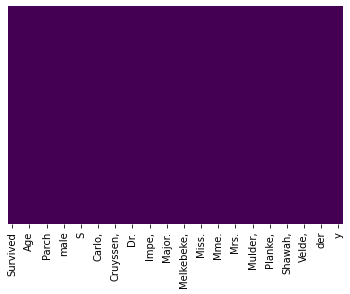

In [55]:
sns.heatmap(data=train.isnull(), yticklabels=False, cbar=False, cmap='viridis')

## Training a Model

In [56]:
X = train.drop('Survived', axis=1)
y = train['Survived']

In [57]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [58]:
logmodel = LogisticRegression(max_iter=10000)

logmodel.fit(X_train, y_train)

LogisticRegression(max_iter=10000)

In [59]:
predictions = logmodel.predict(X_test)

In [60]:
print(confusion_matrix(y_test, predictions))
print(classification_report(y_test, predictions))

[[145  17]
 [ 26  80]]
              precision    recall  f1-score   support

           0       0.85      0.90      0.87       162
           1       0.82      0.75      0.79       106

    accuracy                           0.84       268
   macro avg       0.84      0.82      0.83       268
weighted avg       0.84      0.84      0.84       268



### The model was slightly improved
The model was slightly improved with the extra Title feature. Let's see how accurate a model can be in predicting whether a passenger was male or female.

In [61]:
train = pd.read_csv('titanic_train.csv')

train['Age'] = train[['Age', 'Pclass']].apply(impute_age, axis=1)
train['Title'] = train['Name'].apply(lambda x: x.split()[1])

sexes = pd.get_dummies(train['Sex'], drop_first=True)
embarked = pd.get_dummies(train['Embarked'], drop_first=True)
pass_titles = pd.get_dummies(train['Title'], drop_first=True)

train = pd.concat([train, sexes, embarked, pass_titles], axis=1)
train.drop(['PassengerId', 'Sex', 'Embarked', 'Name', 'Ticket', 'Cabin', 'Title'], axis=1, inplace=True)

train.head()

,Survived,Pclass,Age,SibSp,Parch,Fare,male,Q,S,Capt.,...,"Pelsmaeker,","Planke,",Rev.,"Shawah,","Steen,","Velde,","Walle,",der,the,y
0,0,3,22.0,1,0,7.2500,1,0,1,0,...,0,0,0,0,0,0,0,0,0,0
1,1,1,38.0,1,0,71.2833,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,3,26.0,0,0,7.9250,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
3,1,1,35.0,1,0,53.1000,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
4,0,3,35.0,0,0,8.0500,1,0,1,0,...,0,0,0,0,0,0,0,0,0,0


<AxesSubplot:>

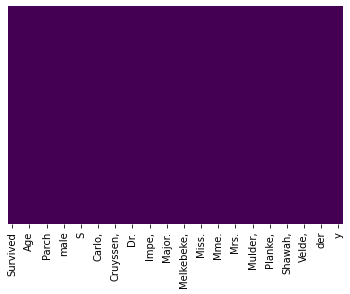

In [62]:
sns.heatmap(data=train.isnull(), yticklabels=False, cbar=False, cmap='viridis')

## Training a Model

In [63]:
X = train.drop('male', axis=1)
y = train['male']

In [64]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [65]:
logmodel = LogisticRegression(max_iter=10000)

logmodel.fit(X_train, y_train)

LogisticRegression(max_iter=10000)

In [66]:
predictions = logmodel.predict(X_test)

In [67]:
print(confusion_matrix(y_test, predictions))
print(classification_report(y_test, predictions))

[[ 88   4]
 [  1 175]]
              precision    recall  f1-score   support

           0       0.99      0.96      0.97        92
           1       0.98      0.99      0.99       176

    accuracy                           0.98       268
   macro avg       0.98      0.98      0.98       268
weighted avg       0.98      0.98      0.98       268



### The model is very accurate!
The model seems to be very accurate for predicting whether a passenger is male or female. This may be related to the discovery during data analysis, that males were less likely to survive. 